# Lebron-James-Shot-Analysis
Dany Marcha
Anthony Shen
name3
name4

Import Data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Load the dataset
file_path = 'lebron_shot_data.csv'
df = pd.read_csv(file_path)

In [5]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
    GAME_ID  GAME_EVENT_ID  PLAYER_ID   PLAYER_NAME     TEAM_ID  \
0  20300014             20       2544  LeBron James  1610612739   
1  20300014             28       2544  LeBron James  1610612739   
2  20300014             35       2544  LeBron James  1610612739   
3  20300014             39       2544  LeBron James  1610612739   
4  20300014             54       2544  LeBron James  1610612739   

             TEAM_NAME  PERIOD  MINUTES_REMAINING  SECONDS_REMAINING  \
0  Cleveland Cavaliers       1                  8                 56   
1  Cleveland Cavaliers       1                  7                 44   
2  Cleveland Cavaliers       1                  7                  1   
3  Cleveland Cavaliers       1                  6                 29   
4  Cleveland Cavaliers       1                  4                 48   

    EVENT_TYPE  ...  SHOT_ZONE_RANGE SHOT_DISTANCE LOC_X LOC_Y  \
0    Made Shot  ...         8-16 ft.            15   158     0   
1

In [6]:
# Basic statistics
print("\nBasic statistics:")
print(df.describe())

# Checking for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Distribution of shots made and missed
print("\nDistribution of shots made and missed:")
print(df['SHOT_MADE_FLAG'].value_counts())


Basic statistics:
            GAME_ID  GAME_EVENT_ID  PLAYER_ID       TEAM_ID        PERIOD  \
count  2.931100e+04   29311.000000    29311.0  2.931100e+04  29311.000000   
mean   2.122812e+07     275.322882     2544.0  1.610613e+09      2.513561   
std    6.048328e+05     172.893844        0.0  4.175265e+00      1.152725   
min    2.030001e+07       1.000000     2544.0  1.610613e+09      1.000000   
25%    2.070056e+07     116.000000     2544.0  1.610613e+09      1.000000   
50%    2.120051e+07     275.000000     2544.0  1.610613e+09      3.000000   
75%    2.170095e+07     401.000000     2544.0  1.610613e+09      3.000000   
max    2.230123e+07     833.000000     2544.0  1.610613e+09      7.000000   

       MINUTES_REMAINING  SECONDS_REMAINING  SHOT_DISTANCE         LOC_X  \
count       29311.000000       29311.000000   29311.000000  29311.000000   
mean            5.044352          28.290676      11.708744     -9.263075   
std             3.458327          17.593051      10.336964 

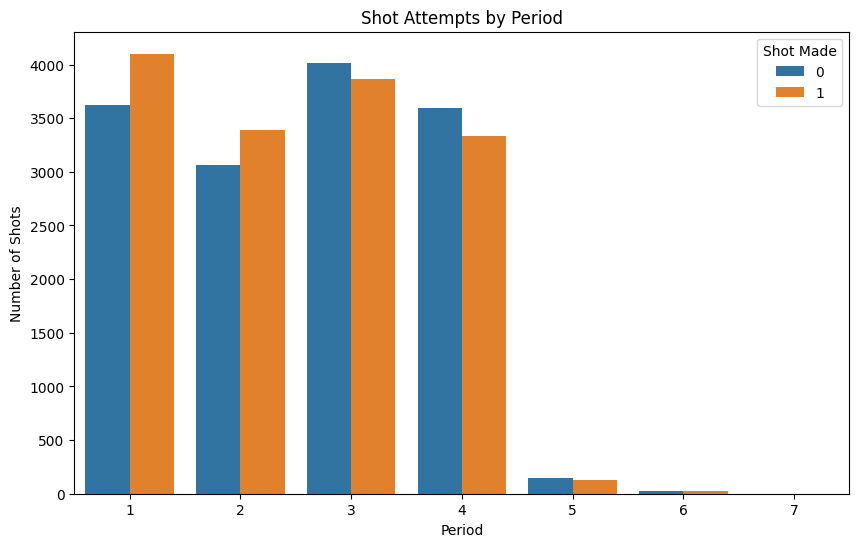

In [7]:
# Visualize the distribution of shot attempts by period
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='PERIOD', hue='SHOT_MADE_FLAG')
plt.title('Shot Attempts by Period')
plt.xlabel('Period')
plt.ylabel('Number of Shots')
plt.legend(title='Shot Made')
plt.show()

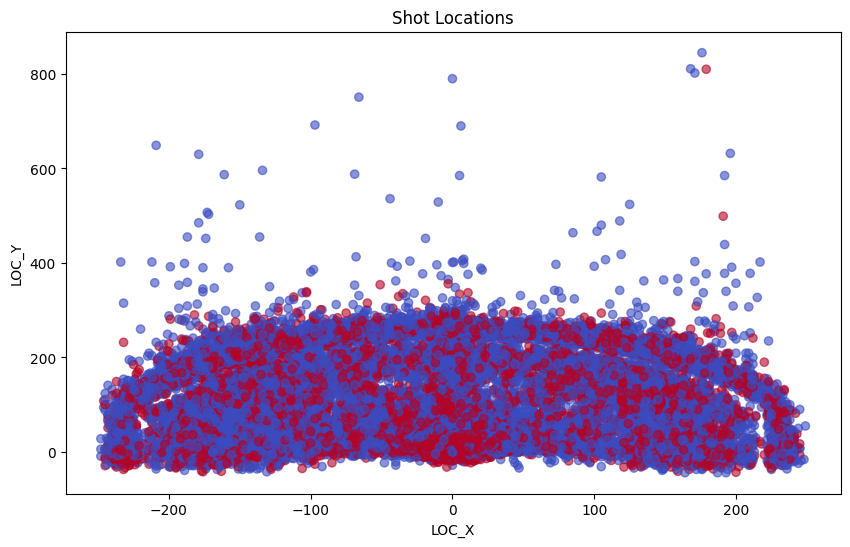

In [8]:
# Visualize shot location (x, y) on the court
plt.figure(figsize=(10, 6))
plt.scatter(df['LOC_X'], df['LOC_Y'], c=df['SHOT_MADE_FLAG'], cmap='coolwarm', alpha=0.6)
plt.title('Shot Locations')
plt.xlabel('LOC_X')
plt.ylabel('LOC_Y')
plt.show()

In [9]:
# Calculate shooting percentage by shot type
shot_type_percentage = df.groupby('SHOT_TYPE')['SHOT_MADE_FLAG'].mean().reset_index()
shot_type_percentage.columns = ['SHOT_TYPE', 'SHOOTING_PERCENTAGE']
print("\nShooting percentage by shot type:")
print(shot_type_percentage)


Shooting percentage by shot type:
        SHOT_TYPE  SHOOTING_PERCENTAGE
0  2PT Field Goal             0.555099
1  3PT Field Goal             0.348065


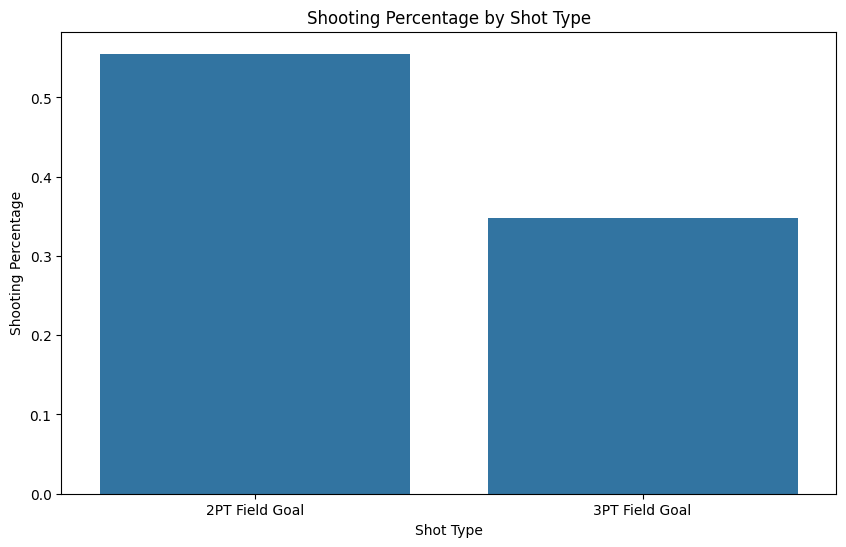

In [10]:
# Visualize shooting percentage by shot type
plt.figure(figsize=(10, 6))
sns.barplot(data=shot_type_percentage, x='SHOT_TYPE', y='SHOOTING_PERCENTAGE')
plt.title('Shooting Percentage by Shot Type')
plt.xlabel('Shot Type')
plt.ylabel('Shooting Percentage')
plt.show()